# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Definimos dos funciones que utilizaremos en forma recurrente. Una para dividir el dataframe en test y train, en una relacion 75-25. A la vez que se separa la variable de salida con las variables de entrada.
La otra función es para calcular y mostrar las métricas elegidas para evaluar el modelo, en este caso usaremos el coeficiente de determinacion y el error cuadrático medio.

In [61]:
def split_train_test(df):
    train_set, test_set = train_test_split(df, test_size=0.25, random_state=72)
    train_set_x=train_set.drop(columns=['Output'])
    train_set_y= train_set['Output']
    test_set_x=test_set.drop(columns=['Output'])
    test_set_y= test_set['Output']
    return train_set_x, train_set_y, test_set_x, test_set_y

def ver_metricas(set, predict_set):
    mse = mean_squared_error(set, predict_set)
    rmse=np.sqrt(mse)
    r2_score_=r2_score(set, predict_set)
    rmse=print(f"RMSE: {round(rmse, 2)}")
    r2_score_=print(f"R2: {round(r2_score_, 3)}")

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



Los datos se generaran con la función Random de Python. Creamos 4 variables con números aleatorios, tanto enteros como flotantes. También, definimos la variable de salida donde intervienen tres de las cuatro variables creadas.

In [62]:
# Definimos un número semilla y el tamaño de la muestra:
np.random.seed(42)
samples=1000

# Creamos las variables con números aleatorios:
var_1 = np.random.rand(samples) * 10
var_2 = np.random.randint(1,100,samples) * np.random.randint(1,10,samples)
var_3 = np.random.rand(samples) * np.random.randint(1,20,samples)
var_4 = np.random.rand(samples) * np.random.randint(1,50,samples)

# Creamos la variable de salida donde interivienen solo 3 variable y agregando ruido:
output = var_1 * np.random.randint(5,20) + var_4 * 2 - var_3 * np.random.randint(1,100) - var_1 * 0.1 - var_4 * np.random.randint(1,100)

# Definimos el dataset:
df=pd.DataFrame({
    'Var_1': var_1,
    'Var_2': var_2,
    'Var_3': var_3,
    'Var_4': var_4,
    'Output': output
})
print(df.head(5))
print('El dataset tiene ', df.shape[0], ' filas y', df.shape[1], 'columnas')

      Var_1  Var_2     Var_3     Var_4       Output
0  3.745401     47  9.003387  6.456067 -1044.543525
1  9.507143     96  6.177132  4.652761  -650.858364
2  7.319939    248  6.663308  6.574020  -802.503981
3  5.986585    240  6.431143  0.051150  -509.368559
4  1.560186    616  5.796289  5.966902  -761.407395
El dataset tiene  1000  filas y 5 columnas


 A continuación, hacemos un pequeño análisis de correlación entre las variables para descubrir como se relacionan entre ellas y con la variable de salida.

<Axes: >

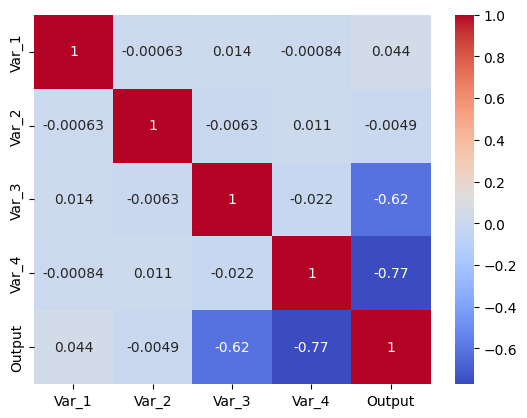

In [63]:
corr=df.corr()
sns.heatmap(corr, annot = True, cmap='coolwarm')

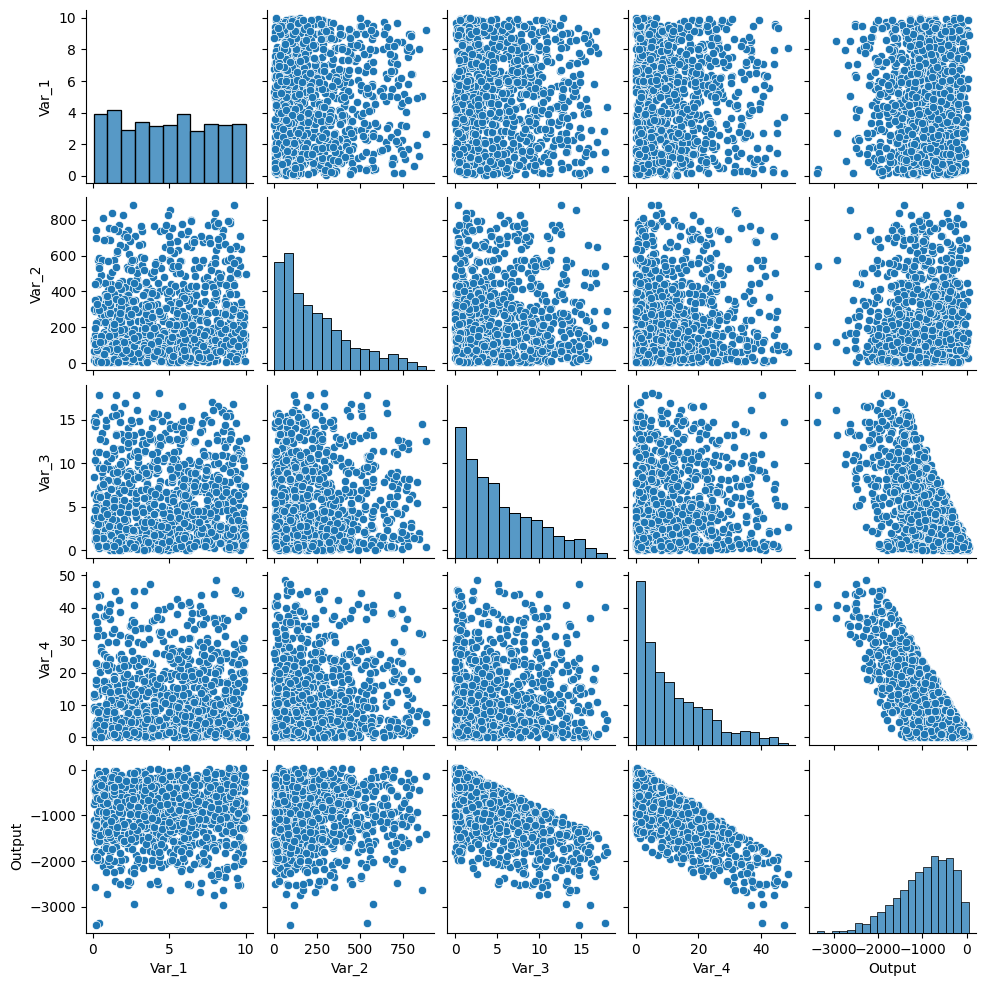

In [64]:
sns.pairplot(df, height=2)

La variable Var_4 tiene una correlación negativa de 0.77 y la variable Var_3 de 0.62, también negativa

## Modelos

# Regresión lineal simple 

Para entrenar un primer modelo utilizaremos solo la variable 4, la cual es la que posee mayor correlación con la variable target. 

In [65]:
# Creamos el dataset con la variable 1 y la variable de salida:
df_regresion_simple=pd.DataFrame(df[['Var_4','Output']])

In [66]:
# Dividimos el dataset en train y test:
train_set_x_regresion_simple, train_set_y_regresion_simple, test_set_x_regresion_simple, test_set_y_regresion_simple= split_train_test(df_regresion_simple)

In [67]:
# Creamos un modelo de regresión lineal y lo entrenamos con el conjunto de entrenamiento: 
regresion_lineal_simple= LinearRegression()
regresion_lineal_simple.fit(train_set_x_regresion_simple.values.reshape(-1,1), train_set_y_regresion_simple.values)
# Calculamos la ordenada al origen y la pendiente de la recta resultante del entrenamiento:
print('Ordenada al origen:',regresion_lineal_simple.intercept_)
print('Pendiente :',regresion_lineal_simple.coef_)

Ordenada al origen: -412.39489570930766
Pendiente : [-44.35001339]


In [68]:
# Calculamos el valor mínimo y máximo de la Var_1 para graficar la recta sobre los datos:
x_min_max=np.array([[df_regresion_simple['Var_4'].min()], [df_regresion_simple['Var_4'].max()]])
y_predict=regresion_lineal_simple.predict(x_min_max)

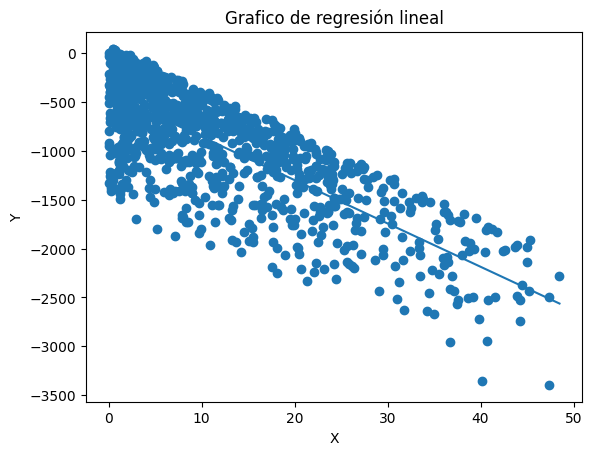

In [69]:
# Graficamos la recta resultante:
plt.plot(x_min_max,y_predict)
plt.scatter(df_regresion_simple['Var_4'], df_regresion_simple['Output'])
plt.title('Grafico de regresión lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [70]:
# Predecimos la salida con el conjunto de entrenamiento y mostramos las métricas:
y_predict_train_regresion_simple= regresion_lineal_simple.predict(train_set_x_regresion_simple.values.reshape(-1,1))
ver_metricas(train_set_y_regresion_simple,y_predict_train_regresion_simple)

RMSE: 377.23
R2: 0.628


In [71]:
# Predecimos la salida con el conjunto de testeo y mostramos las métricas:
y_predict_test_regresion_simple= regresion_lineal_simple.predict(test_set_x_regresion_simple.values.reshape(-1,1))
ver_metricas(test_set_y_regresion_simple,y_predict_test_regresion_simple)

RMSE: 426.12
R2: 0.487


Analizando el resultado obtenido con la regresión lineal simple con la variable Var_4 podemos concluir que; el modelo no es bueno, produce un bajo coeficiente de determinación, el cual apenas alcanza un 0.48 en el conjunto de testeo y un alto error.
También, se puede observar que hay sobreajuste en el entrenamiento, porque hay mucha diferencia entre el resultado de las métricas cuando se predice en el grupo de entrenamiento con el grupo de testeo. 

# Regresión lineal múltiple  

A continuación entrenaremos un modelo de regresión lineal múltiple, donde intervengan las dos variables que mayor correlación tienen con la variable de salida, la variable Var_3 y la variable Var_4.

In [72]:
df_regresion_multiple=pd.DataFrame(df[['Var_4','Var_3','Output']])

In [73]:
# Dividimos el dataset en train y test, esta vez usando Var_3 y Var_4:
train_set_x_regresion_multiple, train_set_y_regresion_multiple, test_set_x_regresion_multiple, test_set_y_regresion_multiple= split_train_test(df_regresion_multiple)

In [74]:
# Creamos un modelo de regresión lineal y lo entrenamos con el conjunto de entrenamiento: 
regresion_lineal_multiple= LinearRegression()
regresion_lineal_multiple.fit(train_set_x_regresion_multiple,train_set_y_regresion_multiple.values.reshape(-1, 1))

LinearRegression()

In [75]:
# Predecimos y evaluamos el modelo con el conjunto de entrenamiento: 
y_predict_train_regresion_simple=regresion_lineal_multiple.predict(train_set_x_regresion_multiple)
ver_metricas(train_set_y_regresion_multiple,y_predict_train_regresion_simple)

RMSE: 31.85
R2: 0.997


In [76]:
# Predecimos y evaluamos el modelo con el conjunto de testeo: 
y_predict_test_regresion_simple=regresion_lineal_multiple.predict(test_set_x_regresion_multiple)
ver_metricas(test_set_y_regresion_multiple,y_predict_test_regresion_simple)

RMSE: 31.77
R2: 0.997


En este caso, podemos decir que el modelo entrenado con las variables de mayor correlación con la variable de salida es robusto y bueno, ya que logra un R2 de 0.99 tanto en el set de testeo como en el de entrenamiento. 
No se observa ni sobreajuste ni un subajuste. Además, al usar solo dos variables de las cuatro, se hace un uso medido de recursos computacionales. 



## Ejercicio de hiper parámetro tunning.

# Árbol de decisión regresor 

Vamos a entrenar un árbol de decisión regresor, usando el hiperparametro de profundidad máxima a la que puede alcanzar el árbol para conocer el punto donde la profundidad máxima ideal donde no se produzca un sobreajuste ni tampoco haya un subajuste de los datos

In [77]:
# Partimos el conjunto de datos, esta vez con las cuatro variables incluidas, en testeo y entrenamiento:
train_set_x_arbol, train_set_y_arbol, test_set_x_regresion_arbol, test_set_y_regresion_arbol= split_train_test(df)

Tomaremos la métrica RMSE como parámetro para medir el comportamiento en las distintas profundidades máximas del árbol. 

[451.95986226589355, 313.49989836327694, 219.3047061490394, 146.8519856255475, 103.56385906214558, 68.99653560460278, 46.39014610370291, 29.03327378953738, 17.00111556753663, 10.172548904326021]


Text(0, 0.5, 'Profundidad máxima')

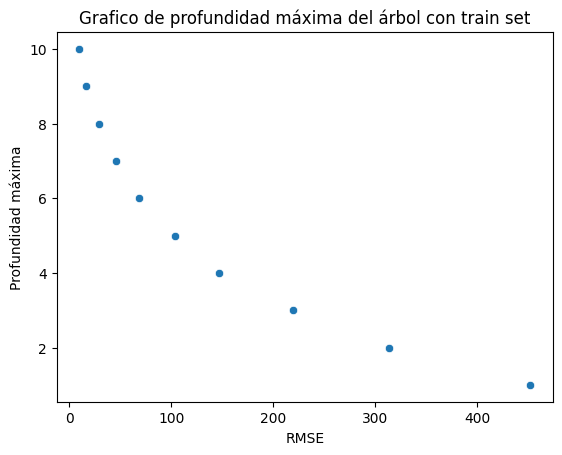

In [78]:
# Creamos una lista para almacenar las métricas conseguidas en las distintas profundidades del árbol evaluadas:
metricas=[]
# Probaremos con profundidades del 1 al 10:
max_depth=[1,2,3,4,5,6,7,8,9,10]
for x in range(1,11):
    arbol_decision= DecisionTreeRegressor(random_state=20, max_depth=x)
    arbol_decision.fit(train_set_x_arbol, train_set_y_arbol)
    y_predit_arbol=arbol_decision.predict(train_set_x_arbol)
    mse = mean_squared_error(train_set_y_arbol, y_predit_arbol)
    rmse=np.sqrt(mse)
    metricas.append(rmse)

print(metricas)
sns.scatterplot(x=metricas, y=max_depth)
plt.title('Grafico de profundidad máxima del árbol con train set')
plt.xlabel('RMSE')
plt.ylabel('Profundidad máxima')


[479.42438774177, 308.7470091560137, 215.86911882579975, 169.32646610897572, 121.20538794540568, 103.97142413482092, 97.65303672704006, 90.25020830185761, 83.42262379245881, 87.35614261540144]


Text(0, 0.5, 'Profundidad máxima')

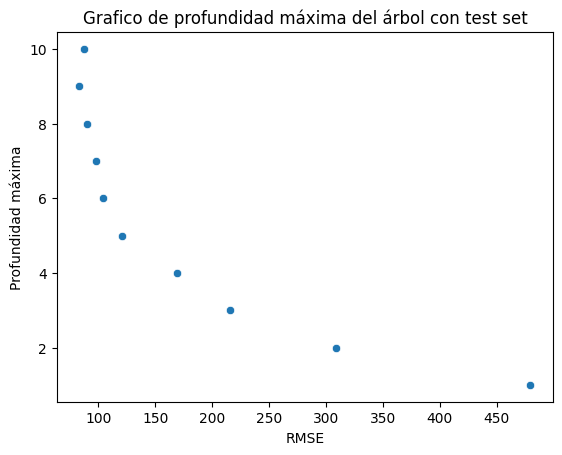

In [79]:
metricas=[]
max_depth=[1,2,3,4,5,6,7,8,9,10]
for x in range(1,11):
    arbol_decision= DecisionTreeRegressor(random_state=20, max_depth=x)
    arbol_decision.fit(train_set_x_arbol, train_set_y_arbol)
    y_predit_arbol=arbol_decision.predict(test_set_x_regresion_arbol)
    mse = mean_squared_error(test_set_y_regresion_arbol, y_predit_arbol)
    rmse=np.sqrt(mse)
    metricas.append(rmse)

print(metricas)
sns.scatterplot(x=metricas, y=max_depth)
plt.title('Grafico de profundidad máxima del árbol con test set')
plt.xlabel('RMSE')
plt.ylabel('Profundidad máxima')


El RMSE disminuye a medida que se aumenta la profundidad del árbol. A partir de la profundidad 6 el RMSE deja de bajar en forma significativa por lo que se podría decir que es el punto ideal para definir la profundidad máxima del árbol, ya que de esta manera no habrá subajuste y evitaremos un sobreajuste del modelo.

Conclusión: 
Con este trabajo se puede ver la importancia de realizar un análisis de la relación que haya entre las variables de entrada con la de salida. En este caso, con un simple diagrama de correlación pudimos observar cuales eran las variable que poseían mayor relación y darles prioridad en el entrenamiento de los modelos.
En el primer modelo de regresión lineal simple, utilizando solo la Va_4, no se obtuvo el resultado esperado, ya que el modelo ni siquiera lograba un coeficiente de determinación de 0.5. Pero, al sumar la Var_3 a un modelo de regresión múltiple, se alcanzo un gran resultado, con un coeficiente de 0.99 y un bajo error, donde además no se malgastan recursos computacionales al no usar todas las variables.